<a href="https://colab.research.google.com/github/abirami1998/DigitalHandwriting/blob/master/gmm_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.mixture import GaussianMixture
from mlxtend.data import loadlocal_mnist

In [17]:
X_train, Y_train = loadlocal_mnist(images_path='train-images.idx3-ubyte',labels_path='train-labels.idx1-ubyte')

In [18]:
x_train = np.asarray(X_train).astype(np.int32)
y_train = np.asarray(Y_train).astype(np.int32)

In [19]:
x_train.shape

(60000, 784)

In [ ]:
X_train=x_train.reshape(60000,28,28)

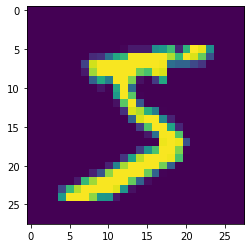

In [ ]:
plt.imshow(X_train[0])

**3- MIXTURE MODEL**


In [ ]:
model3=GaussianMixture(n_components=3,max_iter=100,init_params='kmeans',covariance_type='spherical')
model3.fit_predict(x_train)

array([0, 2, 2, ..., 0, 2, 1])

In [ ]:
X_test,Y_test = loadlocal_mnist(images_path='t10k-images.idx3-ubyte',labels_path='t10k-labels.idx1-ubyte')

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.int32)

In [ ]:
pred_label=model3.predict(x_train)
print (pred_label)

[0 2 2 ... 0 2 1]


**SCATTER PLOT FOR BETTER VISUALIZATION**

In [39]:
def plot_scatterplot(X, N):
    lbl1 = f'Component {0}'
    lbl2 = f'Component {1}'    
    df = pd.DataFrame({lbl1:X[:N,0], lbl2:X[:N,1]})
    sn.lmplot(data=df, x=lbl1, y=lbl2, fit_reg=False, scatter_kws={'alpha':0.5}) 

In [35]:
n = 10000
pred=model5.predict(x_train[:n])
pred.shape
pred_2d = pred.reshape(5000,2)


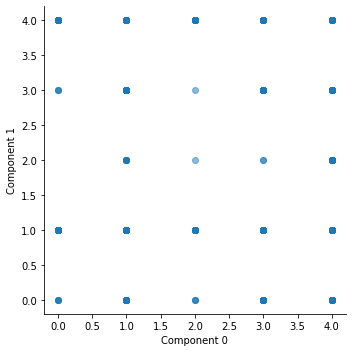

In [40]:
plot_scatterplot(pred_2d,N=10000)

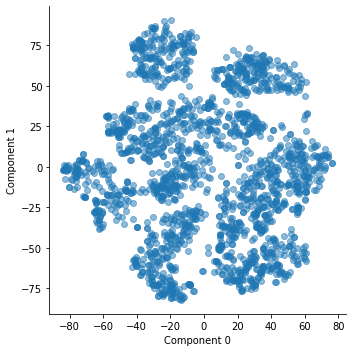

In [ ]:
from sklearn.manifold import TSNE       

n = 10000
np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(x_train[:n])
plot_scatterplot(X_tsne,N=2000)

In [ ]:
X_tsne.shape

(10000, 2)

**Scatterplot using gaussian mixture predictions(3-mix)**


In [ ]:
x_test=X_test.reshape(10000,28,28)

In [ ]:
model3.score_samples(X_test)                           #Log-liklihood for each sample

array([-4237.26676561, -4476.00935256, -3892.62101695, ...,
       -4275.74755854, -4441.88277619, -4494.11095131])

In [ ]:
model3.bic(x_train)

522140065.0246777

In [ ]:
model3.aic(x_train)

522118847.07535195

In [ ]:
model3.score(x_train)                        #Avg log-likelihood per sample

-4350.951108961266

**5-MIXTURE MODEL**


In [20]:
maussianMixture(n_components=5,max_iter=400,init_params='random',covariance_type='full')
model5.fit(x_train)

GaussianMixture(covariance_type='full', init_params='random', max_iter=400,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [41]:
pred5=model5.predict(x_train)
bic=model5.bic(x_train)
print("Bic",bic)
aic=model5.aic(x_train)
print("aic",aic)
scr=model5.score(x_train)
print("Score",scr)
silscr=metrics.silhouette_score(x_train,pred5)
#print("Silhouette Score",silscr)

Bic 101123436.60194743
aic 87237481.54649371
Score -701.2702795541143


In [ ]:
model5.predict_proba(x_train)

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       ...,
       [1.36024177e-205, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000]])

In [ ]:
from sklearn import metrics
metrics.silhouette_score(x_train,pred5)

Predictions on x_test

In [ ]:
pred5test=model5.predict(X_test)
bic=model5.bic(X_test)
print("Bic",bic)
aic=model5.aic(X_test)
print("aic",aic)
scr=model5.score(X_test)
print("Score",scr)
silscr=metrics.silhouette_score(X_test,pred5test)
print("Silhouette Score",silscr)

Bic 92037123098.06674
aic 92026000974.9948
Score -4601145.79634974
Silhouette Score 0.020086136


Generating Samples:

In [29]:
x5,y5=model5.sample(30)

In [30]:
smpl=x5[25].reshape((28,28))

In [33]:
y5

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

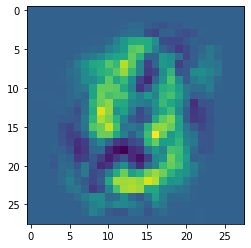

In [32]:
plt.imshow(smpl)